# Exploratory Data Analysis

TASKS:
1. Describe the dataset (e.g., descriptive statistics, missing values, target rate).
    wymiary, ile jest brakujacych danych w poszczgolnych kolumnach, correlation heatmap, 
Describe the feature engineering procedure and the data treatments you followed (if any).
Describe the model selection process you applied (e.g., criteria for feature selection, estimation technique of the model parameters).
Explain the final model in terms of statistical results and business interpretation of regression coefficients.
Present the assumptions of the logistic regression and check if they are fulfilled by your model.
Calculate the following performance metrics: Accuracy, Precision, Recall and F1 score both in Testing and Training samples.
Create the ROC curve (AUC) and explain the discriminatory power of the model both in Testing and Training samples.

In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.getcwd()[:-18])
from source.utils import get_dataFrame_withShortCols, data_cleaner, preprocess_data
import seaborn as snus
import matplotlib.pyplot as plt

## Data Summary

In [2]:
train_data = get_dataFrame_withShortCols('development_sample.csv')
val_data = get_dataFrame_withShortCols('testing_sample.csv')

In [3]:
train_data = data_cleaner(train_data)

In [4]:
train_data = preprocess_data(train_data)

In [6]:
train_data.drop(['Application_status', 'ID', 'Customer ID', 'employment date'], axis=1, inplace=True)
train_data.head()

,Application date,Default indicator,Number of applicants,Distribution channel,Application amount,Credit duration,Payment frequency,Installment amount,Value of the goods,income of main applicant,...,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_,work expirience,loan_purpose_1_0,loan_purpose_1_1,loan_purpose_2_0,loan_purpose_2_1
0,2010-02-01,0.0,1,1,7800,99,1,108.73,NaN,5640,...,0,0,0,3899,0.267045,1893 days,0,0,0,1
1,2010-02-01,0.0,1,2,11100,78,1,195.99,11200.0,3000,...,0,0,0,3899,0.533040,4886 days,0,1,0,0
2,2010-02-01,0.0,2,1,2400,15,1,248.34,NaN,6240,...,0,0,10,3899,0.861555,7576 days,0,0,0,0
3,2010-02-01,0.0,3,2,11800,30,6,3538.68,12400.0,4560,...,0,0,10,3899,0.506451,8093 days,1,0,0,0
5,2010-02-02,0.0,1,1,7200,36,1,267.19,NaN,3960,...,0,0,10,3899,0.003446,NaT,0,0,1,0


In [7]:
train_data.columns

Index(['Application date', 'Default indicator', 'Number of applicants',
       'Distribution channel', 'Application amount', 'Credit duration',
       'Payment frequency', 'Installment amount', 'Value of the goods',
       'income of main applicant', 'income of second applicant',
       'profession of main applicant', 'profession of second applicant',
       'marital status of main applicant',
       'number of children of main applicant',
       'number of dependences of main applicant', 'Spendings estimation',
       'Number of requests during the last 3 months',
       'Number of requests during the last 6 months',
       'Number of requests during the last 9 months',
       'Number of requests during the last 12 months', 'Limit on credit card',
       'Amount on current account', 'Amount on savings account',
       'Arrear in last 3 months', 'Arrear in last 12 months',
       'Credit bureau score', 'Average income', '_r_', 'work expirience',
       'loan_purpose_1_0', 'loan_purpose

In [7]:
filtered_data = train_data[train_data['Loan purpose'] == 1.0]
result = filtered_data['Clasification of the vehicle'].notnull().all()
result

True

AttributeError: 'numpy.float64' object has no attribute 'type'

In [3]:
train_data.head()

,ID,Customer ID,Application date,Default indicator,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
0,11034977,32537148,01Feb2010 0:00:00,0.0,Approved,1,2.0,1,7800,99,...,1,1,0,6768.42,0.00,0,0,0,3899,0.267045
1,11034978,32761663,01Feb2010 0:00:00,0.0,Approved,1,1.0,2,11100,78,...,0,0,15000,5937.66,3870.60,0,0,0,3899,0.533040
2,11034979,32701063,01Feb2010 0:00:00,0.0,Approved,2,3.0,1,2400,15,...,2,2,0,5647.77,1463.08,0,0,10,3899,0.861555
3,11034980,32386786,01Feb2010 0:00:00,0.0,Approved,3,1.0,2,11800,30,...,0,0,0,3594.90,21563.78,0,0,10,3899,0.506451
4,11034981,32692110,02Feb2010 0:00:00,NaN,Rejected,1,2.0,1,10200,72,...,2,2,0,9908.45,0.00,0,0,20,3899,0.210913


In [6]:
train_data.describe()

,ID,Customer ID,Default indicator,Number of applicants,Loan purpose,Application amount,Credit duration,Payment frequency,Installment amount,Value of the goods,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
count,5.000000e+04,5.000000e+04,36718.000000,50000.00000,48597.000000,50000.000000,50000.000000,50000.00000,50000.000000,20827.000000,...,50000.000000,50000.000000,50000.000000,39912.000000,30117.000000,50000.000000,50000.000000,50000.00000,50000.000000,5.000000e+04
mean,1.105998e+07,3.262894e+07,0.030693,1.33786,1.915098,17123.466000,42.141900,1.54724,1330.747722,35911.341048,...,1.355780,1.714940,7693.896000,13058.171210,24822.929304,0.012080,0.044480,6.78040,8182.152860,4.980869e-01
std,1.443390e+04,1.537429e+05,0.172488,0.66462,0.861268,12217.178461,45.378778,1.23719,1619.370201,18153.197904,...,1.591129,1.814075,20984.098355,13389.951429,26670.053145,0.109244,0.206161,10.83386,3190.983287,2.880834e-01
min,1.103498e+07,3.236142e+07,0.000000,1.00000,1.000000,700.000000,6.000000,1.00000,53.980000,4900.000000,...,0.000000,0.000000,0.000000,260.360000,0.000000,0.000000,0.000000,0.00000,3899.000000,3.953460e-07
25%,1.104748e+07,3.249680e+07,0.000000,1.00000,1.000000,6900.000000,15.000000,1.00000,470.112500,21400.000000,...,0.000000,0.000000,0.000000,4989.687500,5928.370000,0.000000,0.000000,0.00000,5035.000000,2.481838e-01
50%,1.105998e+07,3.263026e+07,0.000000,1.00000,2.000000,14100.000000,27.000000,1.00000,842.060000,31400.000000,...,1.000000,1.000000,0.000000,9020.885000,17291.290000,0.000000,0.000000,0.00000,8569.000000,4.966425e-01
75%,1.107248e+07,3.276254e+07,0.000000,1.00000,3.000000,24800.000000,48.000000,1.00000,1548.790000,47100.000000,...,2.000000,2.000000,0.000000,16279.495000,35005.380000,0.000000,0.000000,10.00000,11839.000000,7.468285e-01
max,1.108498e+07,3.289438e+07,1.000000,4.00000,3.000000,63700.000000,312.000000,6.00000,27075.540000,138300.000000,...,23.000000,26.000000,190800.000000,260497.970000,371035.800000,1.000000,1.000000,250.00000,12832.000000,9.999984e-01


In [9]:
val_data.head()

,ID,Customer ID,Application date,Default indicator,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
0,36034977,32653719,03Feb2010 0:00:00,0.0,Approved,1,3.0,1.0,4800,15,...,8,8,0,4977.87,14880.28,0,0,70,3899,0.485674
1,36034978,32832365,04Feb2010 0:00:00,0.0,Approved,2,2.0,1.0,6800,18,...,1,1,29400,7922.90,6534.84,0,0,0,3899,0.267045
2,36034979,32544742,07Feb2010 0:00:00,0.0,Approved,1,3.0,1.0,4600,18,...,0,0,0,3174.15,16974.69,0,0,0,3899,0.793579
3,36034980,32395830,09Feb2010 0:00:00,NaN,Rejected,2,2.0,2.0,7900,48,...,2,2,0,4972.82,3484.36,0,0,10,3899,0.533040
4,36034981,32592943,13Feb2010 0:00:00,0.0,Approved,2,1.0,1.0,9900,63,...,3,3,0,2278.22,9630.53,0,0,10,3899,0.781269


In [10]:
val_data.describe()

,ID,Customer ID,Default indicator,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,Payment frequency,Installment amount,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
count,5.000000e+03,5.000000e+03,3647.000000,5000.000000,4861.000000,4861.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.00000,3977.00000,3039.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,3.603748e+07,3.262122e+07,0.033178,1.353000,1.906398,1.651923,17431.500000,42.900000,1.537200,1348.536758,...,1.390200,1.796000,7835.04000,12949.02650,25254.007466,0.012000,0.04420,7.018000,8220.048400,0.487437
std,1.443520e+03,1.533360e+05,0.179126,0.682997,0.858078,0.735218,12091.838415,45.572928,1.219883,1708.141948,...,1.664121,1.939881,21864.09687,13665.54994,27723.058729,0.108896,0.20556,11.077555,3198.644416,0.287189
min,3.603498e+07,3.236171e+07,0.000000,1.000000,1.000000,1.000000,1000.000000,6.000000,1.000000,53.180000,...,0.000000,0.000000,0.00000,246.50000,0.000000,0.000000,0.00000,0.000000,3899.000000,0.000075
25%,3.603623e+07,3.248680e+07,0.000000,1.000000,1.000000,1.000000,7700.000000,18.000000,1.000000,469.360000,...,0.000000,0.000000,0.00000,4976.77000,5560.225000,0.000000,0.00000,0.000000,5035.000000,0.234235
50%,3.603748e+07,3.261770e+07,0.000000,1.000000,2.000000,1.000000,14500.000000,28.500000,1.000000,827.670000,...,1.000000,1.000000,0.00000,8863.87000,17218.450000,0.000000,0.00000,0.000000,8569.000000,0.483818
75%,3.603873e+07,3.275037e+07,0.000000,2.000000,3.000000,2.000000,24900.000000,51.000000,1.000000,1544.490000,...,2.000000,3.000000,0.00000,15840.28000,35113.895000,0.000000,0.00000,10.000000,11839.000000,0.734368
max,3.603998e+07,3.289419e+07,1.000000,4.000000,3.000000,3.000000,65400.000000,312.000000,6.000000,21723.240000,...,22.000000,22.000000,178800.00000,247650.17000,222423.530000,1.000000,1.00000,170.000000,12832.000000,0.999895


In [11]:
f'Training data dimensions: {train_data.shape}'

'Training data dimensions: (50000, 36)'

In [12]:
f'Validation data dimensions: {val_data.shape}'

'Validation data dimensions: (5000, 36)'

## Null Values

In [8]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]


Value of the goods                19941
income of second applicant        27232
profession of second applicant    27232
Amount on current account          7166
Amount on savings account         14188
work expirience                     552
dtype: int64

In [9]:
val_data.isnull().sum()[val_data.isnull().sum() > 0]

Default indicator                             1353
Loan purpose                                   139
Distribution channel                           139
Value of the goods                            2905
income of second applicant                    3719
profession of second applicant                3719
Property ownership for property renovation    3721
Clasification of the vehicle                  2905
Amount on current account                     1023
Amount on savings account                     1961
dtype: int64

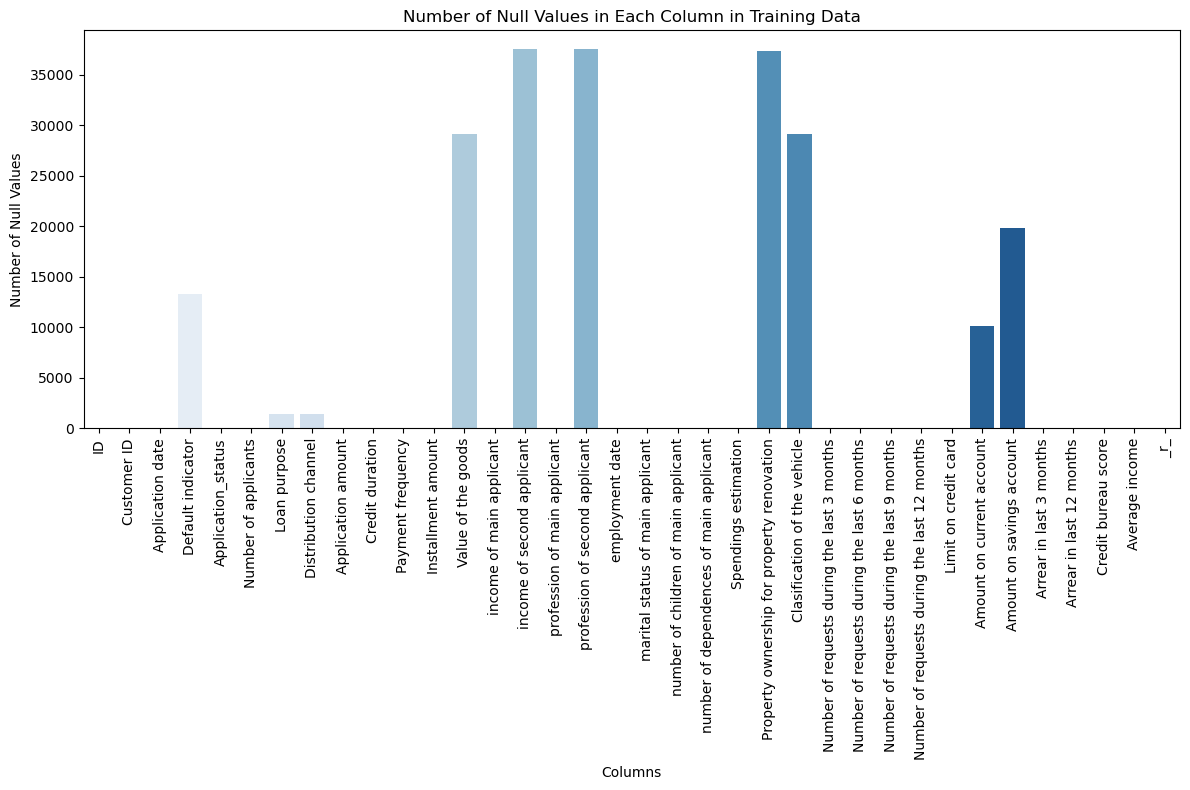

In [18]:
plt.figure(figsize=(12, 8))  
snus.barplot(x=train_data.isnull().sum().index, y=train_data.isnull().sum().values, palette='Blues')
plt.xticks(rotation=90)  
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values in Each Column in Training Data')
plt.tight_layout()  
plt.show()

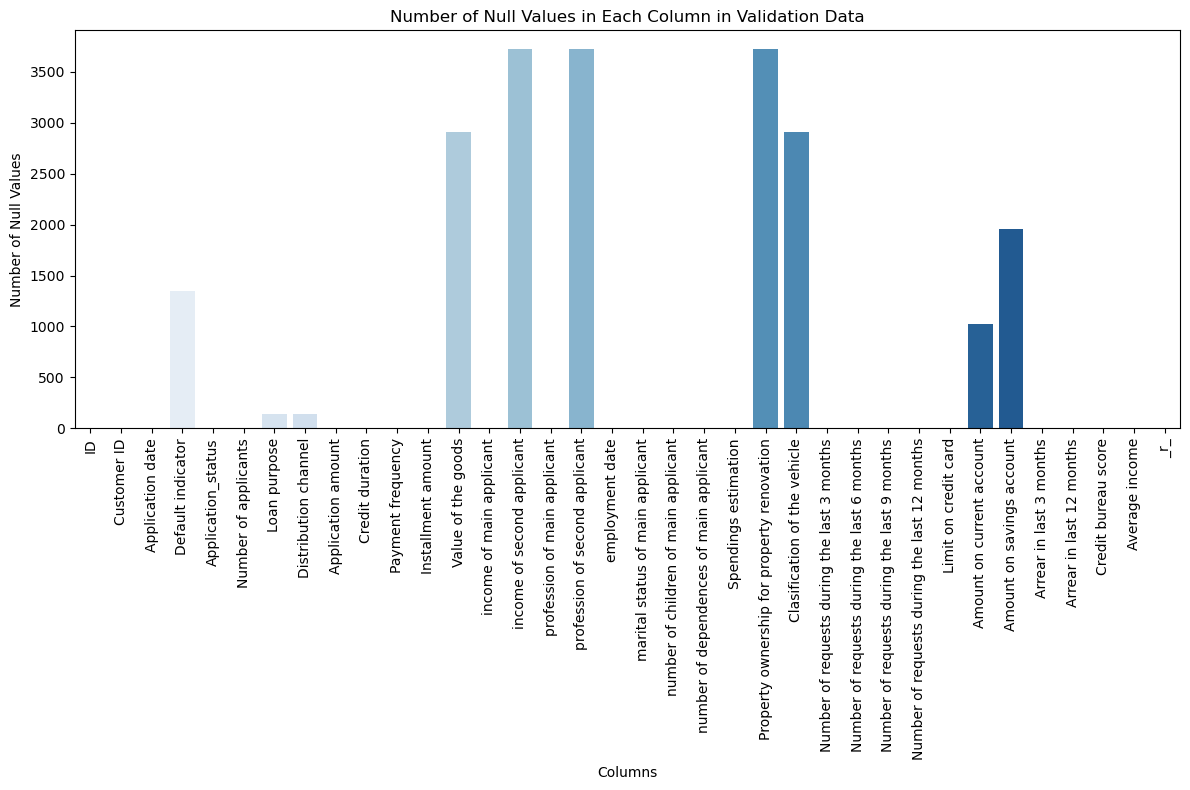

In [19]:
plt.figure(figsize=(12, 8))  
snus.barplot(x=train_data.isnull().sum().index, y=val_data.isnull().sum().values, palette='Blues')
plt.xticks(rotation=90)  
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values in Each Column in Validation Data')
plt.tight_layout()  
plt.show()

In [16]:
train_data[(train_data['income of second applicant'].isnull()) & (train_data['Number of applicants'].eq(1))].equals(train_data[train_data['income of second applicant'].isnull()])


True

In [17]:
train_data[(train_data['profession of second applicant'].isnull()) & (train_data['Number of applicants'].eq(1))].equals(train_data[train_data['profession of second applicant'].isnull()])

True

In [19]:
train_data[(train_data['Value of the goods'].isnull())].equals(train_data[train_data['Clasification of the vehicle'].isnull()])

True

In [20]:
train_data[(train_data['Loan purpose'].isnull())].equals(train_data[train_data['Distribution channel'].isnull()])

True

In [21]:
train_data[train_data['Amount on current account']==0].shape

(0, 36)

In [22]:
train_data[train_data['Amount on savings account']==0].shape

(3745, 36)

In [3]:
train_data, val_data = data_cleaner(train_data), data_cleaner(val_data)

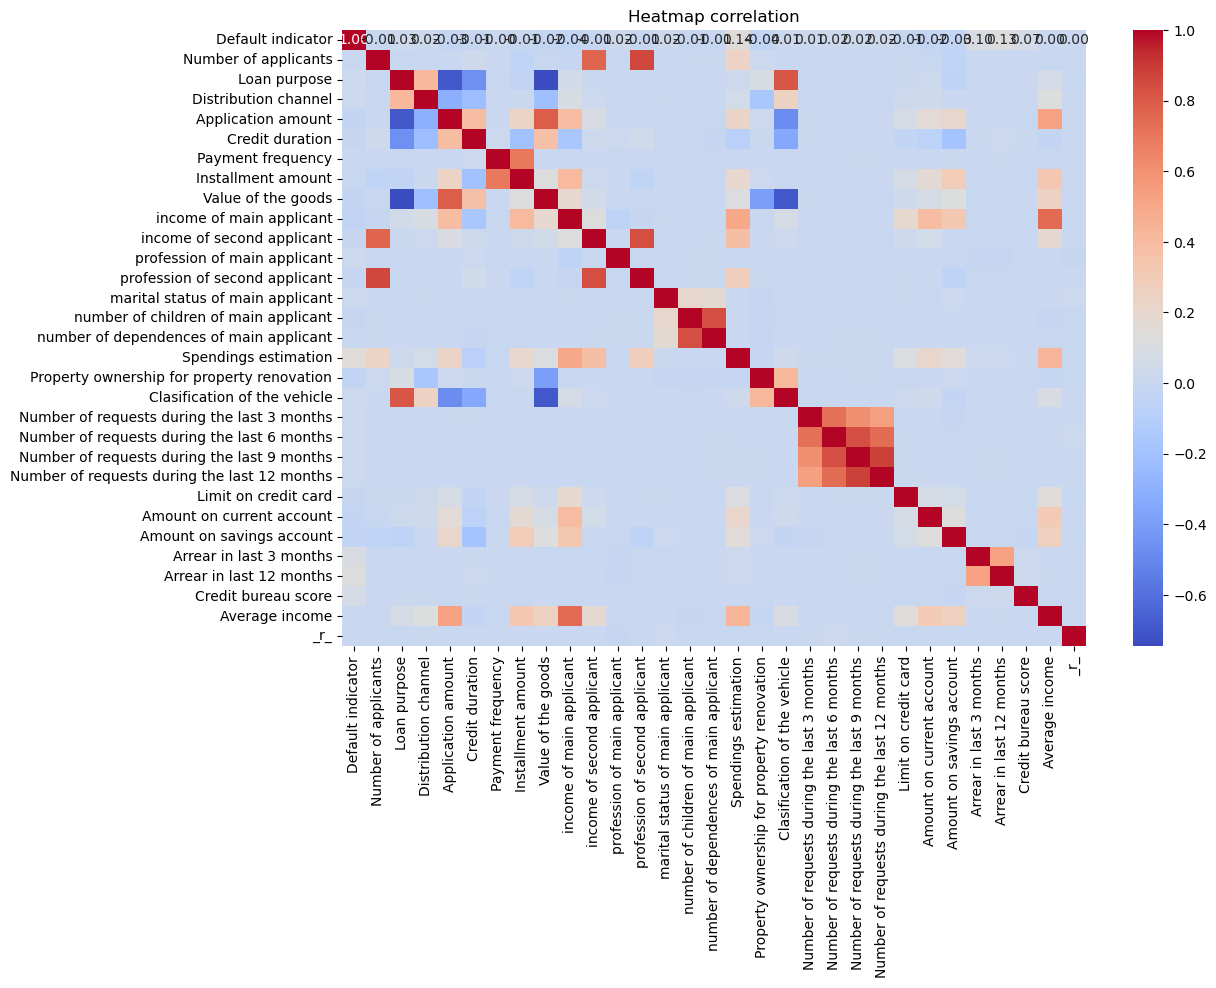

In [4]:
corr_data = train_data.drop(['Application date', 'employment date'], axis=1, inplace=False).corr()

plt.figure(figsize=(12, 8))
snus.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap correlation')
plt.show()